In [2]:
%run ../includes/common-20230414.ipynb

CPython 2025-10-20T22:44:00.345790


CPU times: user 462 µs, sys: 0 ns, total: 462 µs
Wall time: 466 µs


In [5]:
resultfiles = {
    # 'Baleen': 'runs/example/baleen/prefetch_ml-on-partial-hit/ml-ap-0.798545_6_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    # 'RejectX': 'runs/example/rejectx/rejectx-ap-1_0.508154_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'Baseline': 'runs/example/baseline/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'EDE': 'runs/example/ede/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
}

In [6]:
res = {}
for label, filename in resultfiles.items():
    print(label, filename)
    res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})

Baseline runs/example/baseline/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=461)
DT-SLRU runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size

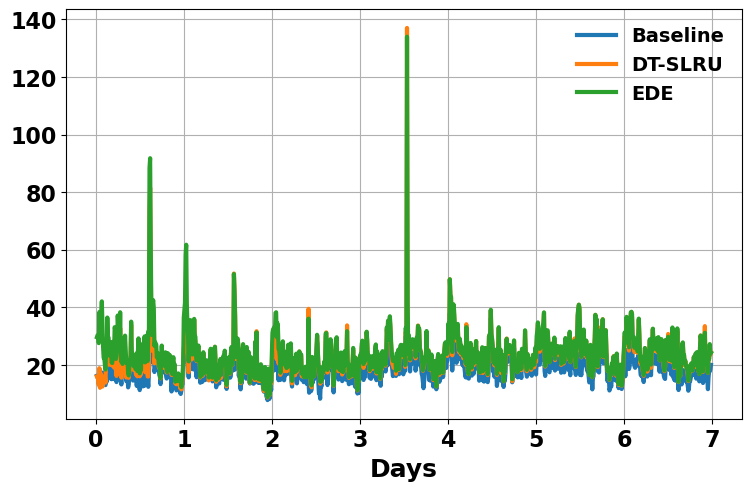

In [8]:
ax = plt.gca()
for label, resv in res.items():
    # if label in ['Baseline', 'DT-SLRU', 'EDE']:
    #     continue
    d_ = res[label].progress['GET+PUT'][600]
    d_['Days'] = d_['Elapsed Trace Time'] / 3600 / 24
    d_.plot(x='Days', y='Util', ax=ax, label=label)
# res['Baleen (ML-Range on Partial-Hit)'].progress['GET+PUT'][600].plot(x='Elapsed Trace Time', y='Util', ax=ax)

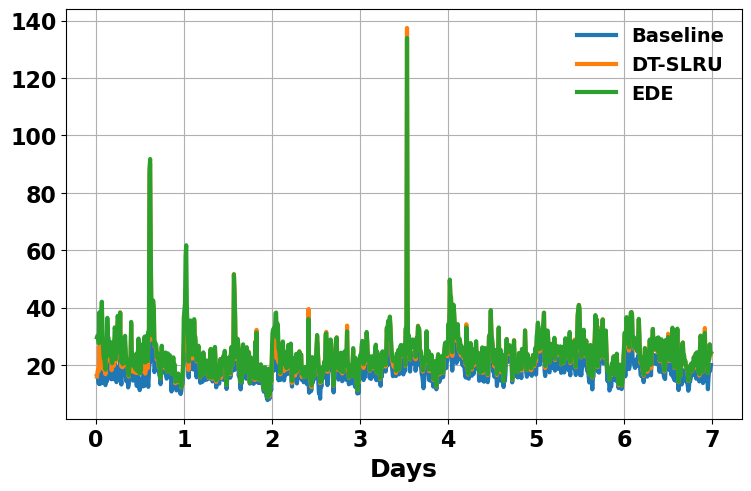

In [317]:
ax = plt.gca()
for label, resv in res.items():
    if label not in ['Baseline', 'DT-SLRU', 'EDE']:
        continue
    d_ = res[label].progress['GET+PUT'][600]
    d_['Days'] = d_['Elapsed Trace Time'] / 3600 / 24
    d_.plot(x='Days', y='Util', ax=ax, label=label)
# res['Baleen (ML-Range on Partial-Hit)'].progress['GET+PUT'][600].plot(x='Elapsed Trace Time', y='Util', ax=ax)

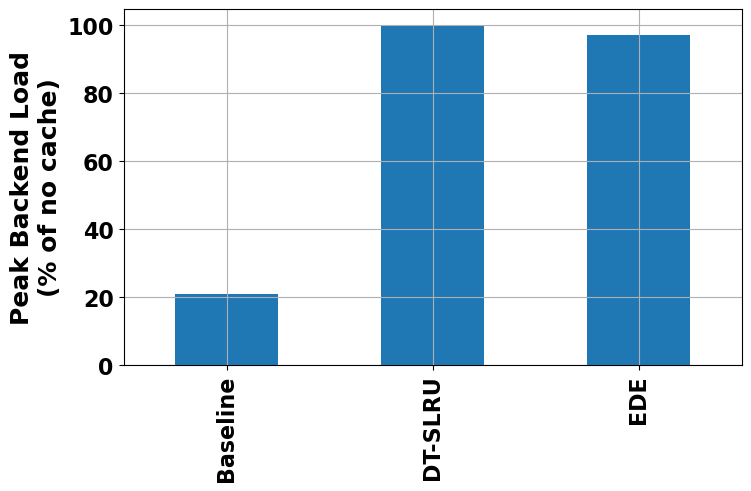

In [9]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)
df['PeakServiceTimeUsedRatio1'] = 1 - df['PeakServiceTimeSavedRatio1']
(df[['Label', 'PeakServiceTimeUsedRatio1']].set_index('Label')['PeakServiceTimeUsedRatio1'] * 100) .plot.bar()
plt.ylabel("Peak Backend Load\n(% of no cache)")
plt.xlabel("")
pass

In [11]:
# df_ = (df[['Label', 'PeakServiceTimeUsedRatio1']].set_index('Label'))['PeakServiceTimeUsedRatio1']
# print("Savings in Peak Load from Baleen on Region1, Sample 0")
# print((1 - df_.loc['Baleen'] / df_.loc['RejectX'])*100)

In [12]:
# ax = plt.gca()
# for label, resv in res.items():
#     if label not in ['Baseline', 'DT-SLRU']:
#         continue
#     d_ = res[label].progress['GET+PUT'][600]
#     d_['Days'] = d_['Elapsed Trace Time'] / 3600 / 24
#     d_.plot(x='Days', y='Util', ax=ax, label=label)
# res['Baleen (ML-Range on Partial-Hit)'].progress['GET+PUT'][600].plot(x='Elapsed Trace Time', y='Util', ax=ax)

res['DT-SLRU'].summary

# new_df = res['DT-SLRU'].summary
# row = new_df.iloc[0]
# vertical = row.T.reset_index()
# vertical.columns = ['Metric', 'Value']
# vertical.to_csv("cache_metrics_full.csv", index=False)

,Write Rate (MB/s),IOPS Saved Ratio,Service Time Saved Ratio,Hit Rate (Hz),AP Threshold,AP Probability,Cache Size (GB),Wasted,Evictions,Filename,Avg Eviction Age (Logical),Avg Eviction Age (s),Max Max Interarrival Time (Logical),Max Max Interarrival Time (s),Avg Max Interarrival Time (Logical),Avg Max Interarrival Time (s),AdmissionPolicy,AdmitBufferSize,SamplingRatio,SampleRatio,SampleStart,Total IOPS,PrefetchWhenThreshold,ApOpt,SimApOpt,SimJobId,LogInterval,NumCacheElems,ServiceTimeTotalOrig,TotalIOPSSaved,TotalIOPSSavedOnly,TotalIOPSPartialHits,IOPSSavedRatio,IOPSSavedOnlyRatio,IOPSPartialHitsRatio,TotalChunkHits,TotalChunkSaved,ChunkHitRatio,TotalIOPSSavedAdmitBuffer,TotalIOPSSavedAdmitBufferOnly,TotalIOPSPartialHitsAdmitBuffer,IOPSSavedAdmitBufferRatio,IOPSSavedAdmitBufferOnlyRatio,IOPSPartialHitsAdmitBufferRatio,TotalChunkHitsAdmitBuffer,TotalChunkSavedAdmitBuffer,ChunkHitAdmitBufferRatio,TotalIOPSSavedFlash,TotalIOPSSavedFlashOnly,TotalIOPSPartialHitsFlash,IOPSSavedFlashRatio,IOPSSavedFlashOnlyRatio,IOPSPartialHitsFlashRatio,TotalChunkHitsFlash,TotalChunkSavedFlash,ChunkHitFlashRatio,TotalIOPSSavedRamPrefetch,TotalIOPSSavedRamPrefetchOnly,TotalIOPSPartialHitsRamPrefetch,IOPSSavedRamPrefetchRatio,IOPSSavedRamPrefetchOnlyRatio,IOPSPartialHitsRamPrefetchRatio,TotalChunkHitsRamPrefetch,TotalChunkSavedRamPrefetch,ChunkHitRamPrefetchRatio,TotalIOPSSavedRamPrefetchFirstHit,TotalIOPSSavedRamPrefetchFirstHitOnly,TotalIOPSPartialHitsRamPrefetchFirstHit,IOPSSavedRamPrefetchFirstHitRatio,IOPSSavedRamPrefetchFirstHitOnlyRatio,IOPSPartialHitsRamPrefetchFirstHitRatio,TotalChunkHitsRamPrefetchFirstHit,TotalChunkSavedRamPrefetchFirstHit,ChunkHitRamPrefetchFirstHitRatio,TotalIOPSSavedFlashNotInRam,TotalIOPSSavedFlashNotInRamOnly,TotalIOPSPartialHitsFlashNotInRam,IOPSSavedFlashNotInRamRatio,IOPSSavedFlashNotInRamOnlyRatio,IOPSPartialHitsFlashNotInRamRatio,TotalChunkHitsFlashNotInRam,TotalChunkSavedFlashNotInRam,ChunkHitFlashNotInRamRatio,TotalIOPSSavedFlashPrefetch,TotalIOPSSavedFlashPrefetchOnly,TotalIOPSPartialHitsFlashPrefetch,IOPSSavedFlashPrefetchRatio,IOPSSavedFlashPrefetchOnlyRatio,IOPSPartialHitsFlashPrefetchRatio,TotalChunkHitsFlashPrefetch,TotalChunkSavedFlashPrefetch,ChunkHitFlashPrefetchRatio,TotalIOPSSavedFlashPrefetchFirstHit,TotalIOPSSavedFlashPrefetchFirstHitOnly,TotalIOPSPartialHitsFlashPrefetchFirstHit,IOPSSavedFlashPrefetchFirstHitRatio,IOPSSavedFlashPrefetchFirstHitOnlyRatio,IOPSPartialHitsFlashPrefetchFirstHitRatio,TotalChunkHitsFlashPrefetchFirstHit,TotalChunkSavedFlashPrefetchFirstHit,ChunkHitFlashPrefetchFirstHitRatio,TotalIOPSSavedRam,TotalIOPSSavedRamOnly,TotalIOPSPartialHitsRam,IOPSSavedRamRatio,IOPSSavedRamOnlyRatio,IOPSPartialHitsRamRatio,TotalChunkHitsRam,TotalChunkSavedRam,ChunkHitRamRatio,TotalFlashQueries,FlashCacheHitRate,ClientBandwidth,FlashWriteRate,FlashPrefetchWriteRate,TotalChunkWritten,FlashChunkWritten,RamWriteRate,RamChunkWritten,RamPrefetchWriteRate,AvgMaxInterarrivalTime,MaxMaxInterarrivalTime,WarmupFinished,AvgMaxInterarrivalTimeEvicted,AvgEvictionAge,AvgNoHitEvictionAge,KeysWritten,NumCacheEviction,MeanTimeInSystem,NumNoHitEvictions,NumEarlyEvictions,NumPrefetches,NumPrefetchesFirstAcc,NumFailedPrefetchesExists,NumFailedPrefetches,NumCacheRejection,AcceptanceRatio,PrefetchSuccessRate,AssumedFlashEaTooLong,AssumedFlashEaTooShort,TooShortEaBonusServiceTimeSavedRatio,AnalysisServiceTimeSaved,AnalysisServiceTimeSavedRatio,AnalysisServiceTimeSavedFromPrefetchRatio,AnalysisIOPSSavedRatio,AnalysisAdmittedChunkRatio,AnalysisAdmittedWriteRate,AnalysisOfflineWR,AnalysisOfflineServiceTimeSavedRatio,AnalysisOfflineMeanTimeInSystem,AnalysisOfflineIOPSSavedRatio,AnalysisOfflineEpisodesAdmitted,AnalysisOfflineCacheSize,AnalysisAdjWR,AnalysisAdjServiceTimeSavedRatio,AnalysisAdjIOPSSavedRatio,AnalysisAdjMeanTimeInSystem,AnalysisAdjEpisodesAdmitted,AnalysisAdjCacheSize,ServiceFetchIOs,ServiceFetchChunks,ServiceFetchChunksDemandmiss,ServiceFetchChunksPrefetch,ServicePutIOs,ServicePutChunks,ServiceGetPutIOs,Serv

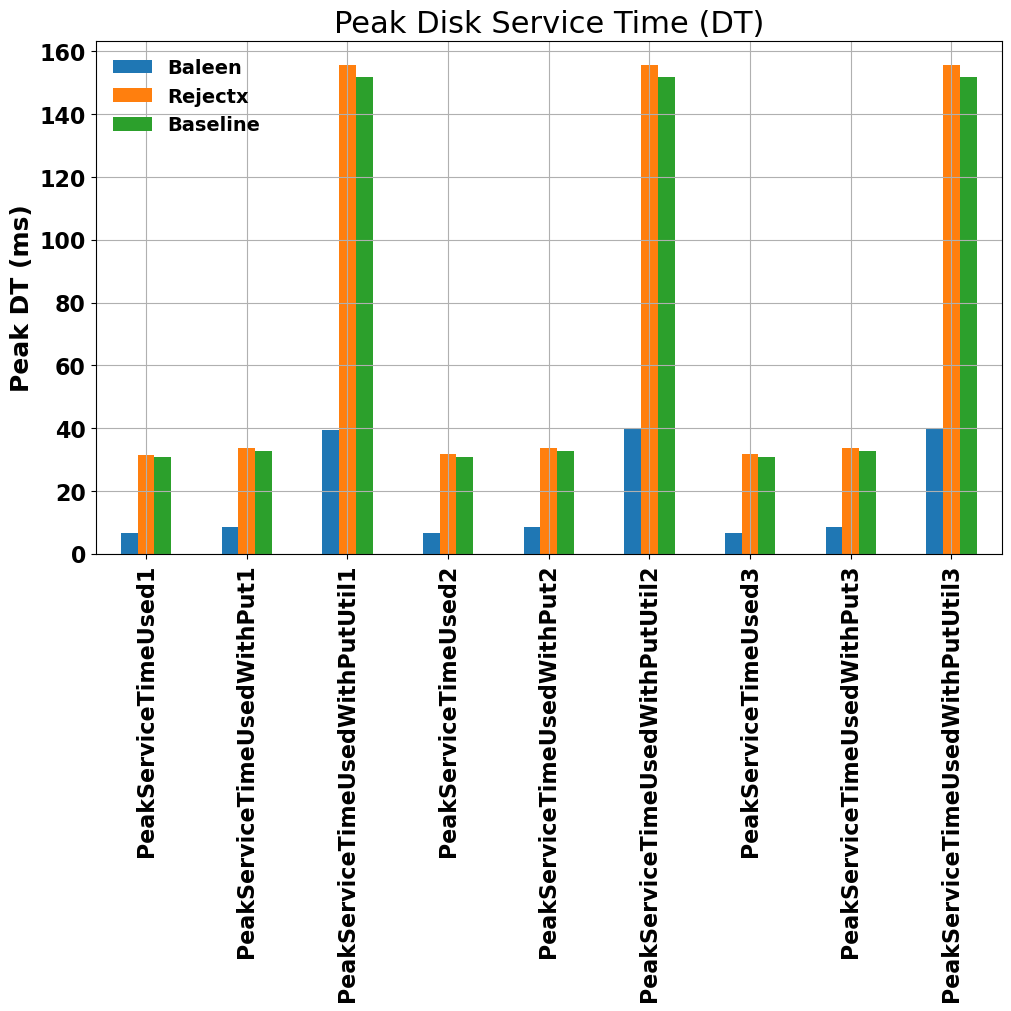

In [13]:
rows = []
for label, resv in res.items():
    if label not in ['Baseline', 'DT-SLRU', 'EDE']:
        continue
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)

# Select relevant columns for Peak DT (service time)
peak_cols = [col for col in df.columns if "PeakServiceTimeUsed" in col]

# print("Columns found:", peak_cols)

# Plot them
df[peak_cols].T.plot(kind="bar", figsize=(10,10))
plt.title("Peak Disk Service Time (DT)")
# bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
# (df[['Label', 'PeakServiceTimeUsed1']].set_index('Label')['PeakServiceTimeUsed1']).T.plot(kind="bar", figsize=(10,6), color=bar_colors)
plt.ylabel("Peak DT (ms)")
plt.xlabel("")
# plt.legend().set_visible(False)
plt.legend(['Baleen', 'Rejectx', 'Baseline', 'DT-SLRU', 'EDE'])
plt.show()

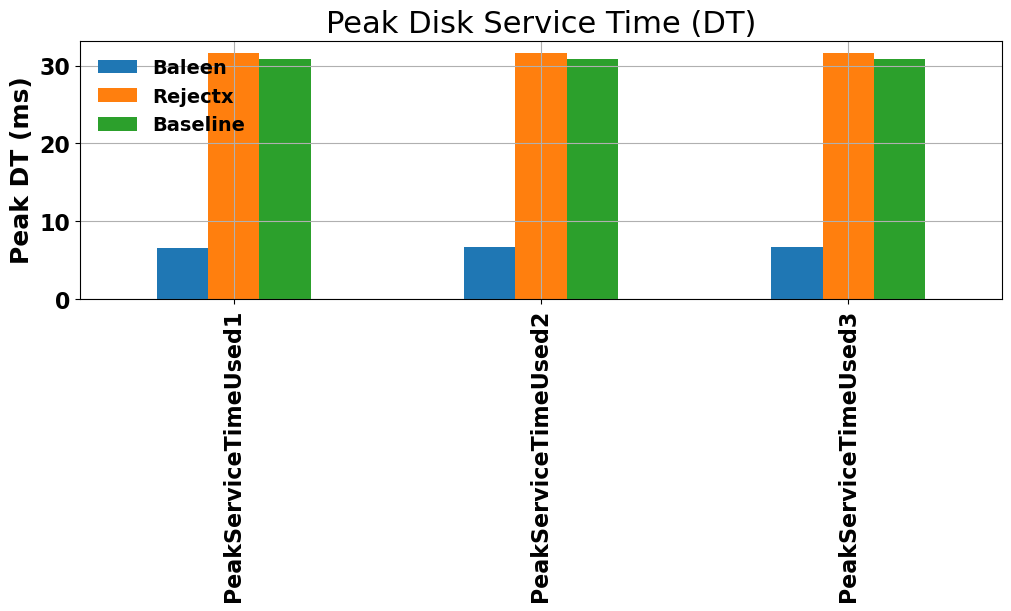

In [14]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)

# Select relevant columns for Peak DT (service time)
# peak_cols = [col for col in df.columns if "PeakServiceTimeUsed" in col]
peak_cols = [col for col in df.columns if col in ["PeakServiceTimeUsed1", "PeakServiceTimeUsed2", "PeakServiceTimeUsed3"]]

# print("Columns found:", peak_cols)

# Plot them
df[peak_cols].T.plot(kind="bar", figsize=(10,6))
plt.title("Peak Disk Service Time (DT)")
# bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
# (df[['Label', 'PeakServiceTimeUsed1']].set_index('Label')['PeakServiceTimeUsed1']).T.plot(kind="bar", figsize=(10,6), color=bar_colors)
plt.ylabel("Peak DT (ms)")
plt.xlabel("")
# plt.legend().set_visible(False)
plt.legend(['Baleen', 'Rejectx', 'Baseline', 'DT-SLRU', 'EDE'])
plt.show()

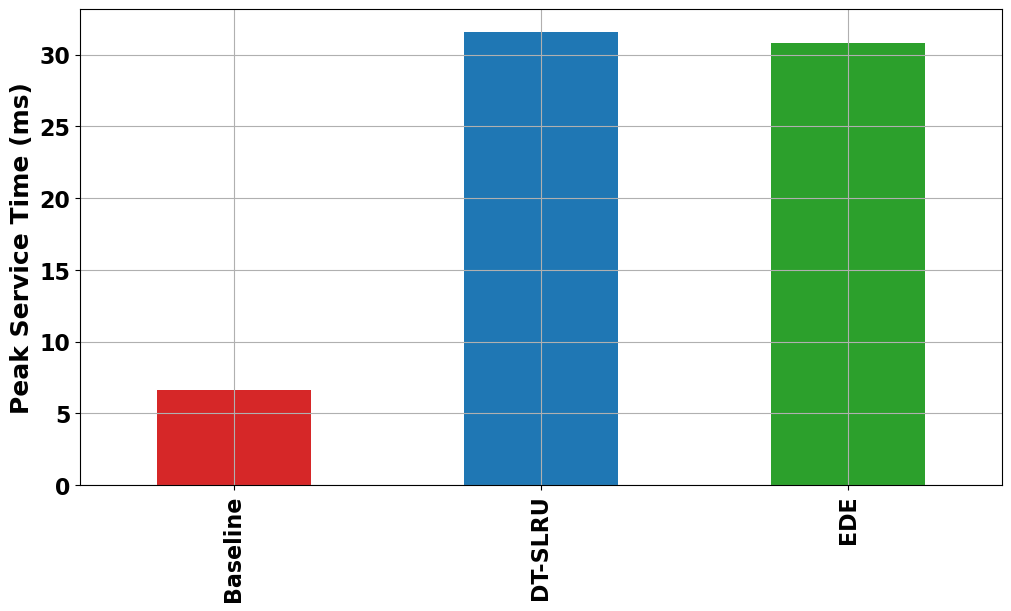

In [16]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)

# Select relevant columns for Peak DT (service time)
# peak_cols = [col for col in df.columns if "PeakServiceTimeUsed" in col]

# print("Columns found:", peak_cols)

# Plot them
# df[peak_cols].T.plot(kind="bar", figsize=(10,6))
# plt.title("Peak Disk Service Time (DT) Across Layers")
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
(df[['Label', 'PeakServiceTimeUsed1']].set_index('Label')['PeakServiceTimeUsed1']).T.plot(kind="bar", figsize=(10,6), color=bar_colors)
plt.ylabel("Peak Service Time (ms)")
plt.xlabel("")
plt.legend().set_visible(False)
plt.show()

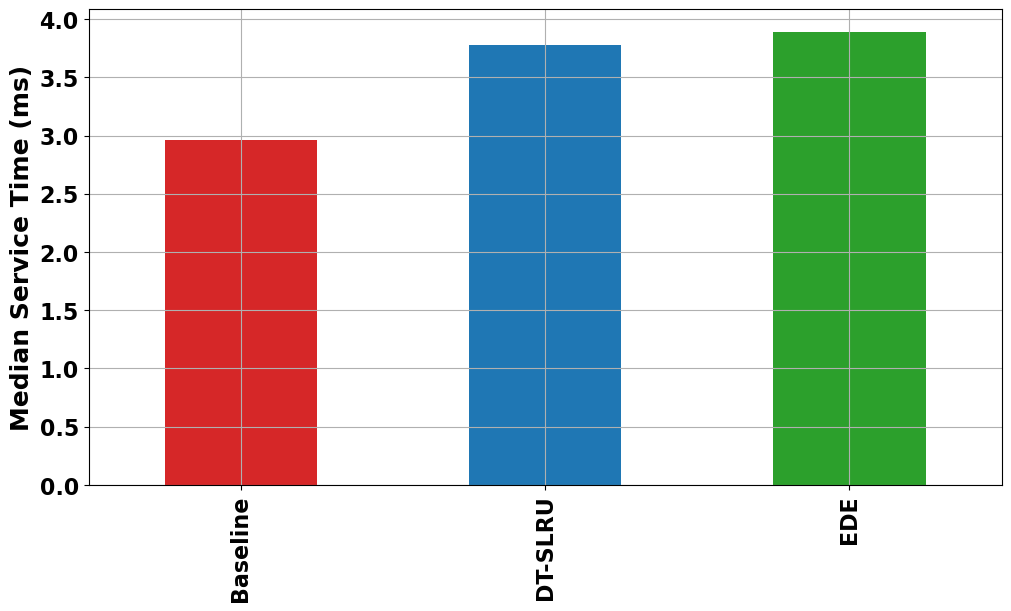

In [17]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)

# Select relevant columns for Peak DT (service time)
# peak_cols = [col for col in df.columns if "PeakServiceTimeUsed" in col]

# print("Columns found:", peak_cols)

# Plot them
# df[peak_cols].T.plot(kind="bar", figsize=(10,6))
# plt.title("Peak Disk Service Time (DT) Across Layers")
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
(df[['Label', 'P50ServiceTimeUsed1']].set_index('Label')['P50ServiceTimeUsed1']).T.plot(kind="bar", figsize=(10,6), color=bar_colors)
plt.ylabel("Median Service Time (ms)")
plt.xlabel("")
plt.legend().set_visible(False)
plt.show()

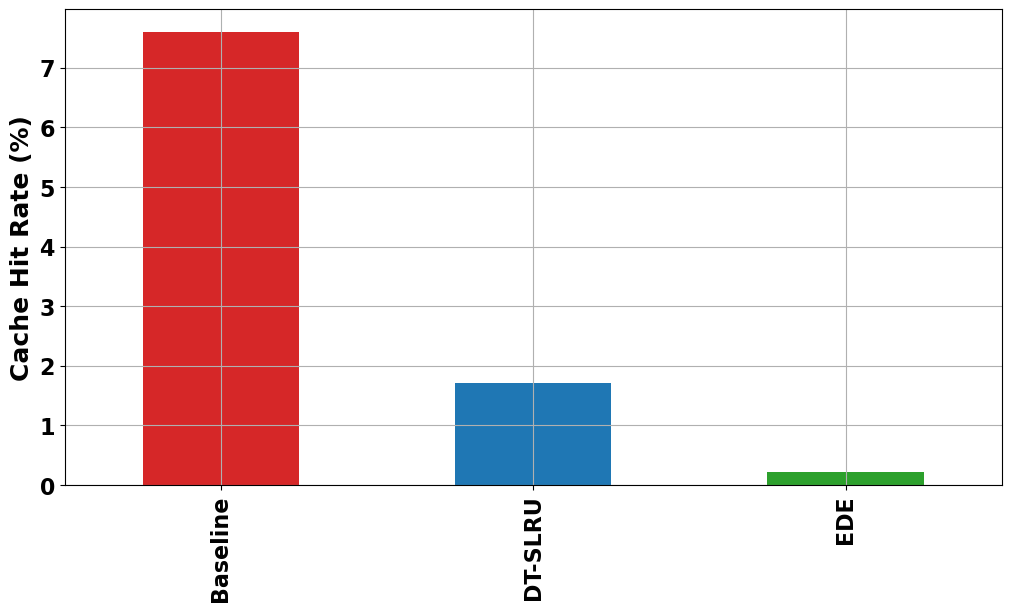

In [18]:
rows = []
for label, resv in res.items():
    resv.summary['Label'] = label
    rows.append(resv.summary)
df = pd.concat(rows)

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
(df[['Label', 'Hit Rate (Hz)']].set_index('Label')['Hit Rate (Hz)'] * 100).T.plot(kind="bar", figsize=(10,6), color=bar_colors)
plt.ylabel("Cache Hit Rate (%)")
plt.xlabel("")
plt.legend().set_visible(False)
plt.show()

In [19]:
new_resultfiles = {
    'DT-SLRU_1': 'runs/example/dt-slru/acceptall-1_lru_100GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_1.1': 'runs/example/dt-slru/acceptall-1_lru_166.475GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_2': 'runs/example/dt-slru/acceptall-1_lru_200GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_2.1': 'runs/example/dt-slru/acceptall-1_lru_266.475GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_3': 'runs/example/dt-slru/acceptall-1_lru_300GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_3.1': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_4': 'runs/example/dt-slru/acceptall-1_lru_400GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_4.1': 'runs/example/dt-slru/acceptall-1_lru_466.475GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_5': 'runs/example/dt-slru/acceptall-1_lru_500GB/full_0_0.1_cache_perf.txt.lzma',
    'DT-SLRU_5.1': 'runs/example/dt-slru/acceptall-1_lru_566.475GB/full_0_0.1_cache_perf.txt.lzma',
}

lru_resultfiles = {
    'LRU_1': 'runs/example/baseline/acceptall-1_lru_100GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_1.1': 'runs/example/baseline/acceptall-1_lru_166.475GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_2': 'runs/example/baseline/acceptall-1_lru_200GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_2.1': 'runs/example/baseline/acceptall-1_lru_266.475GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_3': 'runs/example/baseline/acceptall-1_lru_300GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_3.1': 'runs/example/baseline/acceptall-1_lru_366.475GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_4': 'runs/example/baseline/acceptall-1_lru_400GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_4.1': 'runs/example/baseline/acceptall-1_lru_466.475GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_5': 'runs/example/baseline/acceptall-1_lru_500GB/full_0_0.1_cache_perf.txt.lzma',
    'LRU_5.1': 'runs/example/baseline/acceptall-1_lru_566.475GB/full_0_0.1_cache_perf.txt.lzma',
}

new_res = {}
for label, filename in new_resultfiles.items():
    # print(label, filename)
    new_res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})
    
lru_res = {}
for label, filename in lru_resultfiles.items():
    # print(label, filename)
    lru_res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})

Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'SimRAMUsage', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=461)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'SimRAMUsage', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=461)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (

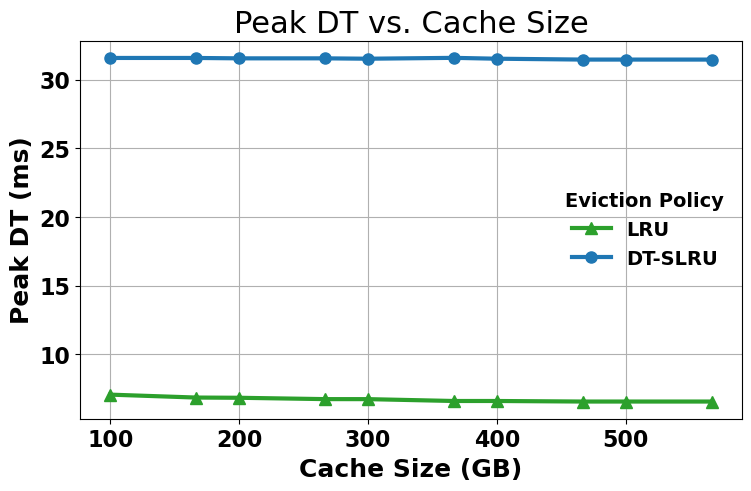

In [21]:
new_rows = []
for label, resv in new_res.items():
    resv.summary['Label'] = label
    new_rows.append(resv.summary)
df1 = pd.concat(new_rows)

lru_rows = []
for label, resv in lru_res.items():
    resv.summary['Label'] = label
    lru_rows.append(resv.summary)
lru_df = pd.concat(lru_rows)

# # Assign column names
# peak_col = 'PeakServiceTimeUsed1'
# cache_col = 'Cache Size (GB)'

# # Plot Peak DT vs Cache Size
# plt.figure(figsize=(10,10))
# plt.plot(df[cache_col], df1[peak_col], marker='o', linestyle='-', color='steelblue')

# plt.title("Peak Disk Service Time (DT) vs Cache Size")
# plt.xlabel("Cache Size (GB)")
# plt.ylabel("Peak Service Time (ms)")
# plt.grid(True)
# plt.show()


df1 = df1.sort_values('Cache Size (GB)')
df2 = lru_df.sort_values('Cache Size (GB)')

# # Each label = one experiment series
# for label, group in df1.groupby('Label'):
#     group = group.sort_values('Cache Size (GB)')
#     plt.plot(group['Cache Size (GB)'],
#              group['PeakServiceTimeUsed3'],
#              marker='o', linewidth=2, label=label)

# print(df1[['Label', 'Cache Size (GB)', 'PeakServiceTimeUsed3']])
# print(df2[['Label', 'Cache Size (GB)', 'PeakServiceTimeUsed3']])


# plt.title("Peak Disk Service Time (DT) vs Cache Size")
# plt.xlabel("Cache Size (GB)")
# plt.ylabel("Peak Service Time (ms)")
# plt.grid(True)
# # plt.legend(title="Experiment")
# plt.show()

plt.plot(
    df2['Cache Size (GB)'],
    df2['PeakServiceTimeUsed1'],
    marker='^',
    linewidth=3,
    color='tab:green',
    label='LRU'
)

plt.plot(
    df1['Cache Size (GB)'],
    df1['PeakServiceTimeUsed1'],
    marker='o',
    linewidth=3,
    color='tab:blue',
    label='DT-SLRU'
)

plt.title("Peak DT vs. Cache Size")
plt.xlabel("Cache Size (GB)")
plt.ylabel("Peak DT (ms)")
plt.grid(True)
plt.legend(title="Eviction Policy")
plt.show()

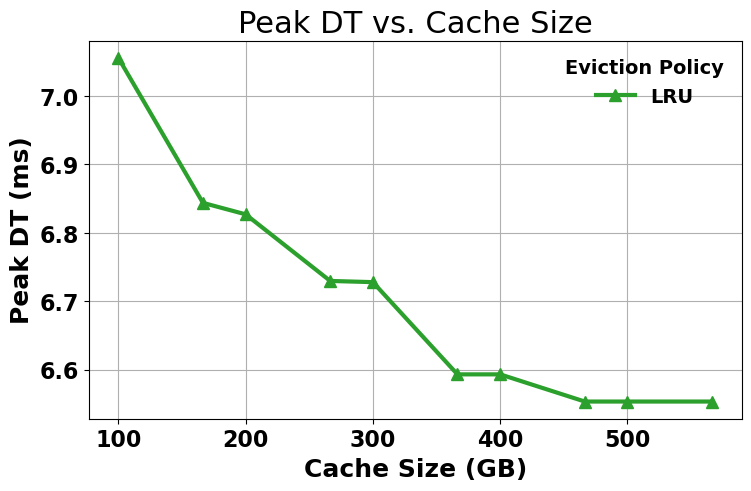

In [22]:
plt.plot(
    df2['Cache Size (GB)'],
    df2['PeakServiceTimeUsed1'],
    marker='^',
    linewidth=3,
    color='tab:green',
    label='LRU'
)

plt.title("Peak DT vs. Cache Size")
plt.xlabel("Cache Size (GB)")
plt.ylabel("Peak DT (ms)")
plt.grid(True)
plt.legend(title="Eviction Policy")
plt.show()

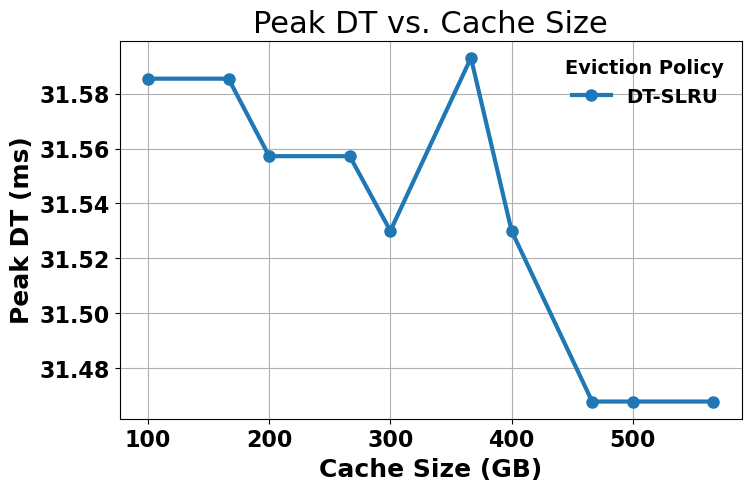

In [23]:
plt.plot(
    df1['Cache Size (GB)'],
    df1['PeakServiceTimeUsed1'],
    marker='o',
    linewidth=3,
    color='tab:blue',
    label='DT-SLRU'
)

plt.title("Peak DT vs. Cache Size")
plt.xlabel("Cache Size (GB)")
plt.ylabel("Peak DT (ms)")
plt.grid(True)
plt.legend(title="Eviction Policy")
plt.show()

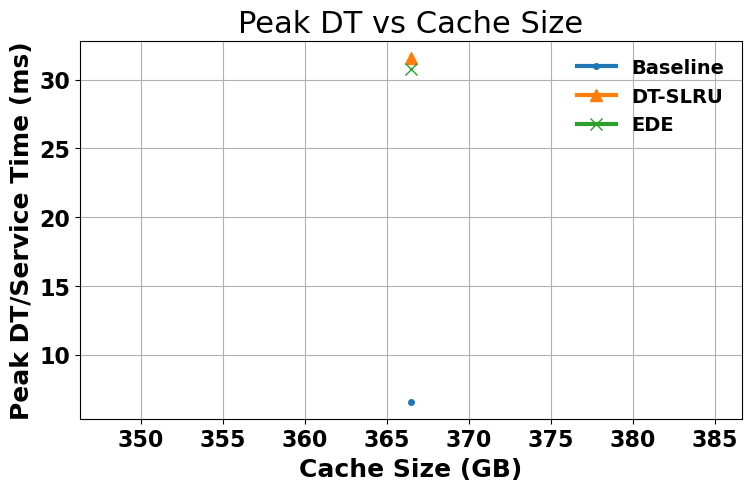

In [26]:
for label, group in df.groupby('Label'):
    if label == 'Baleen':
        plt.plot(group['Cache Size (GB)'], group['PeakServiceTimeUsed1'], marker='.', label=label)
    if label == 'RejectX':
        plt.plot(group['Cache Size (GB)'], group['PeakServiceTimeUsed1'], marker='.', label=label)
    if label == 'Baseline':
        plt.plot(group['Cache Size (GB)'], group['PeakServiceTimeUsed1'], marker='.', label=label)
    if label == 'DT-SLRU':
        plt.plot(group['Cache Size (GB)'], group['PeakServiceTimeUsed1'], marker='^', label=label)
    if label == 'EDE':
        plt.plot(group['Cache Size (GB)'], group['PeakServiceTimeUsed1'], marker='x', label=label)


plt.title("Peak DT vs Cache Size")
plt.xlabel("Cache Size (GB)")
plt.ylabel("Peak DT/Service Time (ms)")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
dt_slru_resultfiles = {
    'DT-SLRU_0.0001': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.0001_cache_perf.txt.lzma',
    'DT-SLRU_0.0002': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.0002_cache_perf.txt.lzma',
    'DT-SLRU_0.0003': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.0003_cache_perf.txt.lzma',
    'DT-SLRU_0.0004': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.0004_cache_perf.txt.lzma',
    'DT-SLRU_0.0005': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.0005_cache_perf.txt.lzma',
    'DT-SLRU_0.0010': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.001_cache_perf.txt.lzma',
    'DT-SLRU_0.0020': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.002_cache_perf.txt.lzma',
    'DT-SLRU_0.0040': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.004_cache_perf.txt.lzma',
    'DT-SLRU_0.0080': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.008_cache_perf.txt.lzma',
    'DT-SLRU_0.0160': 'runs/example/dt-slru/acceptall-1_lru_366.475GB/full_0_0.1_0.016_cache_perf.txt.lzma',
}

dt_slru_res = {}
for label, filename in dt_slru_resultfiles.items():
    # print(label, filename)
    dt_slru_res[label] = results.get({'Region': 'Region1', 'Filename':f'../../{filename}'})
    
dt_slru_rows = []
for label, resv in dt_slru_res.items():
    resv.summary['Label'] = label
    dt_slru_rows.append(resv.summary)
dt_slru_df = pd.concat(dt_slru_rows)

# print(dt_slru_df)

Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=462)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB/s)', 'IOPS Saved Ratio', 'Service Time Saved Ratio', 'Hit Rate (Hz)', 'AP Threshold', 'AP Probability', 'Cache Size (GB)', 'Wasted', 'Evictions', 'Filename',
       ...
       'WarmupTime', 'Prefetch Ratio', 'Completed', 'Region', 'ExperimentSuffix', 'ConfigFile', 'Target Cache Size', 'RegionLabel', 'RegionLabelOrig', 'AdmissionPolicyLabel'], dtype='object', length=462)
Error: 'Prefetch-Range'
<class 'pandas.core.frame.DataFrame'>
Index(['Write Rate (MB

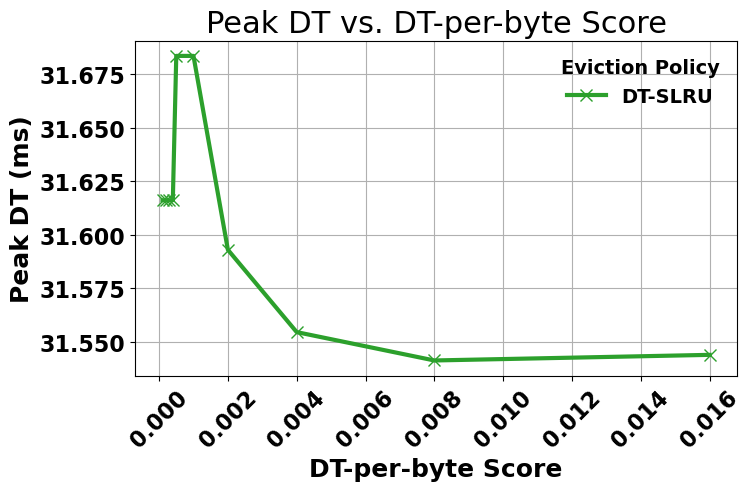

In [28]:
# print(dt_slru_df['DT-per-byte Score'])

plt.plot(
    dt_slru_df['DT-per-byte Score'],
    dt_slru_df['PeakServiceTimeUsed1'],
    marker='x',
    linewidth=3,
    color='tab:green',
    label='DT-SLRU'
)

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(rotation=45) 
plt.title("Peak DT vs. DT-per-byte Score")
plt.xlabel("DT-per-byte Score")
plt.ylabel("Peak DT (ms)")
plt.grid(True)
plt.legend(title="Eviction Policy")
plt.show()